In [1]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.morphology import remove_small_holes, erosion, square
import warnings
import math
warnings.filterwarnings("ignore")

In [2]:
def imshow(im, titulo='', cmap=None, rango=(None, None)):
    plt.figure()
    plt.imshow(im, vmin=rango[0], vmax=rango[1], cmap=cmap)
    plt.title(r'{}'.format(titulo), fontdict={'fontsize': 24})
    plt.axis('off')
    plt.show()

In [3]:
def rgb2gray(rgb):
    imagen = np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    matriz = []
    for k1 in range(len(rgb)):
        fila = []
        for k2 in range(len(rgb[0])):
            fila.append(min(int(imagen[k1][k2]),255))
        matriz.append(fila)
    return matriz

In [4]:
def histograma(imagen):
    
    contador = []
    for i in range(256):
        contador.append(0)

    for k1 in range(len(imagen)):
        for k2 in range(len(imagen[0])):
            contador[int(imagen[k1][k2])] = contador[int(imagen[k1][k2])] + 1
    
    histograma = contador
    norma = 0

    for j in range(256):
        norma = norma + histograma[j]

    for k in range(256):
        histograma[k] = histograma[k]/norma
    
    return histograma

In [5]:
def distribucion_acumulada(imagen):
    histograma_hecho = histograma(imagen)
    
    distribucion_acumulada = histograma_hecho
    
    for i in range(len(histograma_hecho)-1):
        distribucion_acumulada[i+1] = distribucion_acumulada[i+1] + distribucion_acumulada[i]
    
    return distribucion_acumulada

In [6]:
def ecualizacion_imagen(imagen):
    
    matriz = []
    
    d_a = distribucion_acumulada(imagen)

    for k1 in range(len(imagen)):
        fila = []
        for k2 in range(len(imagen[0])):   
            fila.append(255*d_a[int(imagen[k1][k2])])
        matriz.append(fila)
    
    return matriz

In [7]:
def imagen_separada(imagen, indice):
    
    im = []
    
    for k1 in range(len(imagen)):
        fila = []
        for k2 in range(len(imagen[0])):
            fila.append(imagen[k1][k2][indice])
        im.append(fila)
            
    return im

In [8]:
def imagen_total_ecualizada(imagen):
    im_t_1 = imagen_separada(imagen, 0)
    im_t_2 = imagen_separada(imagen, 1)
    im_t_3 = imagen_separada(imagen, 2)
    
    im_ec_1 = ecualizacion_imagen(im_t_1)
    im_ec_2 = ecualizacion_imagen(im_t_2)
    im_ec_3 = ecualizacion_imagen(im_t_3)
    
    matriz = []
    
    for k1 in range(len(imagen)):
        filas = []
        for k2 in range(len(imagen[0])):
            filas.append([int(im_ec_1[k1][k2]), int(im_ec_2[k1][k2]), int(im_ec_3[k1][k2])])
        matriz.append(filas)
        
    return matriz

In [9]:
def exp_simple(imagen_ecualizada):
    
    imagen_final = []
    
    for k1 in range(len(imagen_ecualizada)):
        fila = []
        for k2 in range(len(imagen_ecualizada[0])):
            if imagen_ecualizada[k1][k2] == 255:
                fila.append(255)
            else:
                l = 100
                fila.append(int(min((-1)*math.log(1 - imagen_ecualizada[k1][k2]/255)*l,255)))
                
        imagen_final.append(fila)
    
    return imagen_final

In [10]:
def exp_complejo(imagen_ecualizada):
    
    matriz = []
    
    im_1 = []
    im_2 = []
    im_3 = []
    
    for k1 in range(len(imagen_ecualizada)):
        filas_1 = []
        filas_2 = []
        filas_3 = []
        for k2 in range(len(imagen_ecualizada[0])):
            filas_1.append(imagen_ecualizada[k1][k2][0])
            filas_2.append(imagen_ecualizada[k1][k2][1])
            filas_3.append(imagen_ecualizada[k1][k2][2])
        im_1.append(filas_1)
        im_2.append(filas_2)
        im_3.append(filas_3)
    
    im_1_l = exp_simple(im_1)
    im_2_l = exp_simple(im_2)
    im_3_l = exp_simple(im_3)
    
    for j1 in range(len(imagen_ecualizada)):
        filas_total = []
        for j2 in range(len(imagen_ecualizada[0])):
            filas_total.append([int(im_1_l[j1][j2]),int(im_2_l[j1][j2]),int(im_3_l[j1][j2])])
    
        matriz.append(filas_total)
             
    return matriz

In [11]:
def triangular_simple(imagen_ecualizada):
    
    imagen_final = []
    
    for k1 in range(len(imagen_ecualizada)):
        fila = []
        for k2 in range(len(imagen_ecualizada[0])):
            l = 85
            fraccion = imagen_ecualizada[k1][k2]/255
            if fraccion <= 0.5:
                fila.append(int(math.sqrt(2*fraccion)*l + l))
            else:
                fila.append(int((3-math.sqrt(2-2*fraccion))*l))
                
        imagen_final.append(fila)
    
    return imagen_final

In [12]:
def triangular_complejo(imagen_ecualizada):
    
    matriz = []
    
    im_1 = []
    im_2 = []
    im_3 = []
    
    for k1 in range(len(imagen_ecualizada)):
        filas_1 = []
        filas_2 = []
        filas_3 = []
        for k2 in range(len(imagen_ecualizada[0])):
            filas_1.append(imagen_ecualizada[k1][k2][0])
            filas_2.append(imagen_ecualizada[k1][k2][1])
            filas_3.append(imagen_ecualizada[k1][k2][2])
        im_1.append(filas_1)
        im_2.append(filas_2)
        im_3.append(filas_3)
    
    im_1_l = triangular_simple(im_1)
    im_2_l = triangular_simple(im_2)
    im_3_l = triangular_simple(im_3)
    
    for j1 in range(len(imagen_ecualizada)):
        filas_total = []
        for j2 in range(len(imagen_ecualizada[0])):
            filas_total.append([int(im_1_l[j1][j2]),int(im_2_l[j1][j2]),int(im_3_l[j1][j2])])
    
        matriz.append(filas_total)
             
    return matriz

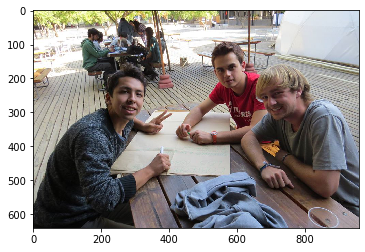

In [13]:
#IMAGENES
# 1) Beto

beto = plt.imread('beto.jpg')
plt.imshow(beto)

In [14]:
beto_gris = rgb2gray(beto)

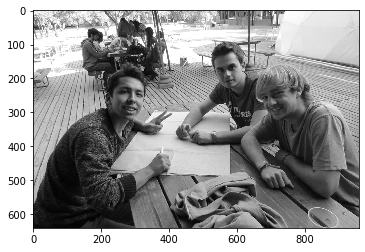

In [15]:
plt.imshow(beto_gris, cmap=plt.get_cmap('gray'))

In [16]:
#Ecualizacion de ambas imagenes (gris y RGB)

beto_rgb_ecualizado = imagen_total_ecualizada(beto)
beto_gris_ecualizado = ecualizacion_imagen(beto_gris)

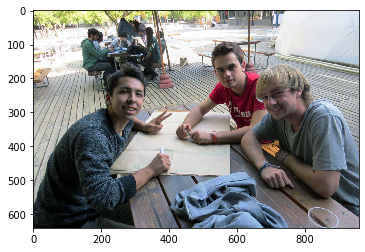

In [17]:
plt.imshow(beto_rgb_ecualizado)

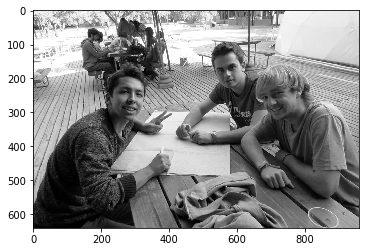

In [18]:
plt.imshow(beto_gris_ecualizado, cmap=plt.get_cmap('gray'))

In [19]:
# Aplicar distribucion exponencial

beto_rgb_ecualizado_exp = exp_complejo(beto_rgb_ecualizado)
beto_gris_ecualizado_exp = exp_simple(beto_gris_ecualizado)

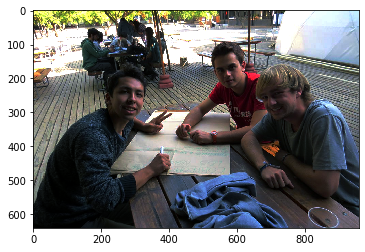

In [20]:
plt.imshow(beto_rgb_ecualizado_exp)

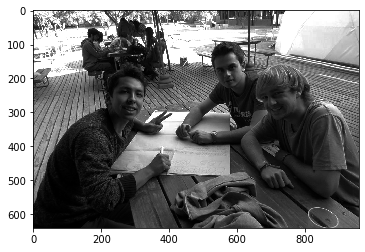

In [21]:
plt.imshow(beto_gris_ecualizado_exp, cmap=plt.get_cmap('gray'))

In [22]:
#Aplicacion de distribucion triangular

beto_rgb_ecualizado_tri = triangular_complejo(beto_rgb_ecualizado)
beto_gris_ecualizado_tri = triangular_simple(beto_gris_ecualizado)

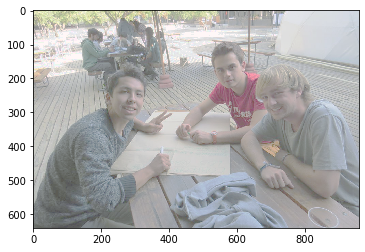

In [23]:
plt.imshow(beto_rgb_ecualizado_tri)

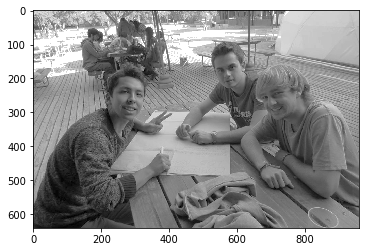

In [24]:
plt.imshow(beto_gris_ecualizado_tri, cmap=plt.get_cmap('gray'))

In [25]:
vector_x = []

for k in range(256):
    vector_x.append(k)

In [26]:
# Ahora graficaremos los histogramas y la distribucion acumulada de la imagen GRIS

histograma_gris = histograma(beto_gris)
acumulada_gris = distribucion_acumulada(beto_gris)

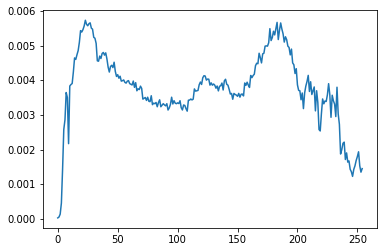

In [27]:
plt.plot(vector_x[0:255], histograma_gris[0:255])

plt.show()

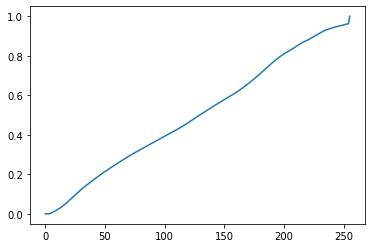

In [28]:
plt.plot(vector_x, acumulada_gris)

plt.show()

In [29]:
# Gris Ecualizada

histograma_gris_ecualizado = histograma(beto_gris_ecualizado)
acumulada_gris_ecualizado = distribucion_acumulada(beto_gris_ecualizado)

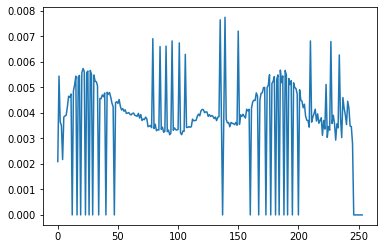

In [30]:
plt.plot(vector_x[0:254], histograma_gris_ecualizado[0:254])

plt.show()

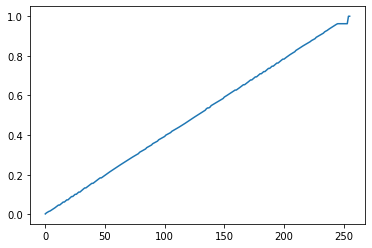

In [31]:
plt.plot(vector_x, acumulada_gris_ecualizado)

plt.show()

In [32]:
#Especificacion Exponencial

histograma_gris_ecualizado_exp = histograma(beto_gris_ecualizado_exp)
acumulada_gris_ecualizado_exp = distribucion_acumulada(beto_gris_ecualizado_exp)

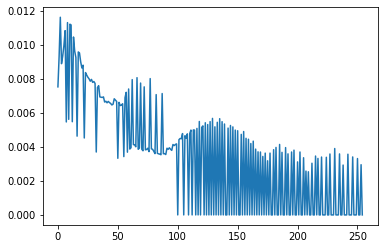

In [33]:
plt.plot(vector_x[0:255], histograma_gris_ecualizado_exp[0:255])

plt.show()

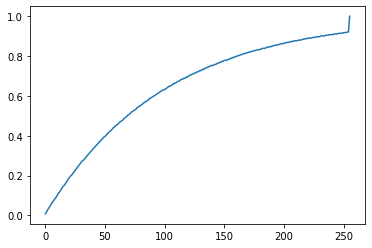

In [34]:
plt.plot(vector_x, acumulada_gris_ecualizado_exp)

plt.show()

In [35]:
#Especificacion Triangular

histograma_gris_ecualizado_tri = histograma(beto_gris_ecualizado_tri)
acumulada_gris_ecualizado_tri = distribucion_acumulada(beto_gris_ecualizado_tri)

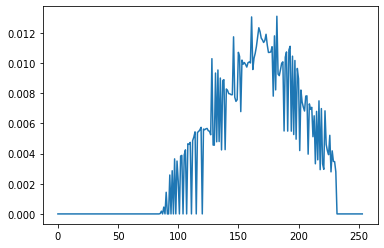

In [36]:
plt.plot(vector_x[0:254], histograma_gris_ecualizado_tri[0:254])

plt.show()

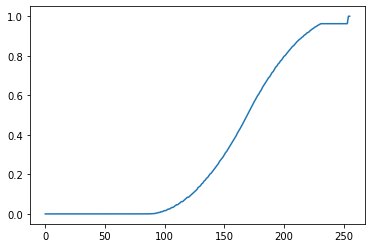

In [37]:
plt.plot(vector_x, acumulada_gris_ecualizado_tri)

plt.show()

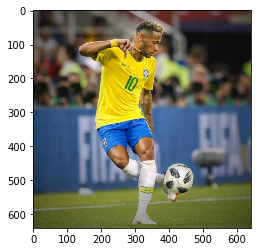

In [38]:
#IMAGENES
# 1) Neymar

neymar = plt.imread('neymar.jpg')
plt.imshow(neymar)

In [39]:
neymar_gris = rgb2gray(neymar)

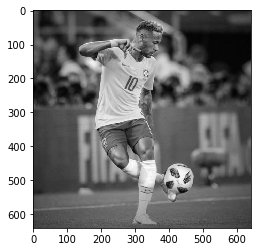

In [40]:
plt.imshow(neymar_gris, cmap=plt.get_cmap('gray'))

In [41]:
#Ecualizacion de ambas imagenes (gris y RGB)

neymar_rgb_ecualizado = imagen_total_ecualizada(neymar)
neymar_gris_ecualizado = ecualizacion_imagen(neymar_gris)

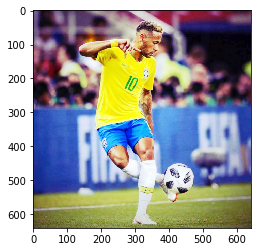

In [42]:
plt.imshow(neymar_rgb_ecualizado)

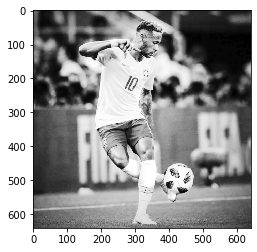

In [43]:
plt.imshow(neymar_gris_ecualizado, cmap=plt.get_cmap('gray'))

In [44]:
# Aplicar distribucion exponencial

neymar_rgb_ecualizado_exp = exp_complejo(neymar_rgb_ecualizado)
neymar_gris_ecualizado_exp = exp_simple(neymar_gris_ecualizado)

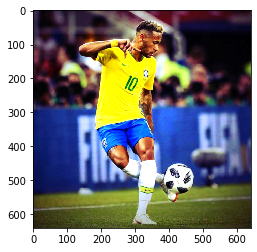

In [45]:
plt.imshow(neymar_rgb_ecualizado_exp)

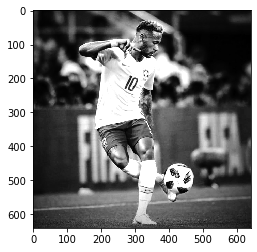

In [46]:
plt.imshow(neymar_gris_ecualizado_exp, cmap=plt.get_cmap('gray'))

In [47]:
#Aplicacion de distribucion triangular

neymar_rgb_ecualizado_tri = triangular_complejo(neymar_rgb_ecualizado)
neymar_gris_ecualizado_tri = triangular_simple(neymar_gris_ecualizado)

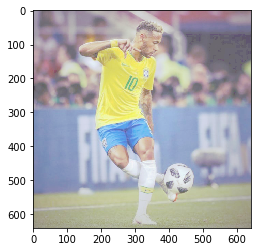

In [48]:
plt.imshow(neymar_rgb_ecualizado_tri)

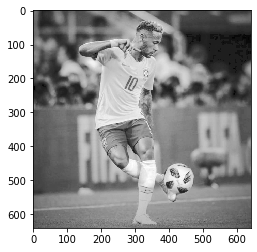

In [49]:
plt.imshow(neymar_gris_ecualizado_tri, cmap=plt.get_cmap('gray'))

In [50]:
# Ahora graficaremos los histogramas y la distribucion acumulada de la imagen GRIS

histograma_gris = histograma(neymar_gris)
acumulada_gris = distribucion_acumulada(neymar_gris)

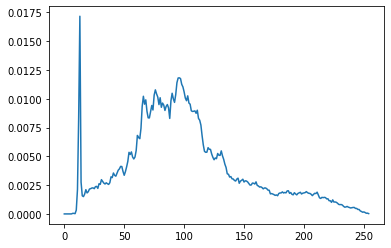

In [51]:
plt.plot(vector_x[0:255], histograma_gris[0:255])

plt.show()

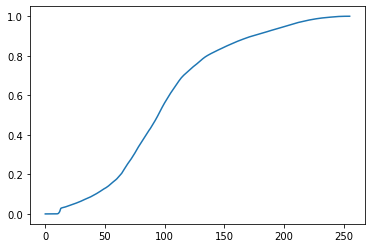

In [52]:
plt.plot(vector_x, acumulada_gris)

plt.show()

In [53]:
# Gris Ecualizada

histograma_gris_ecualizado = histograma(neymar_gris_ecualizado)
acumulada_gris_ecualizado = distribucion_acumulada(neymar_gris_ecualizado)

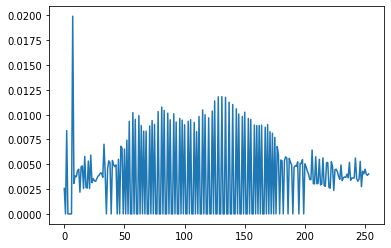

In [54]:
plt.plot(vector_x[0:254], histograma_gris_ecualizado[0:254])

plt.show()

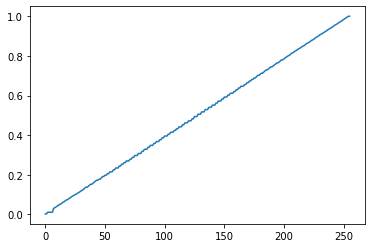

In [55]:
plt.plot(vector_x, acumulada_gris_ecualizado)

plt.show()

In [56]:
#Especificacion Exponencial

histograma_gris_ecualizado_exp = histograma(neymar_gris_ecualizado_exp)
acumulada_gris_ecualizado_exp = distribucion_acumulada(neymar_gris_ecualizado_exp)

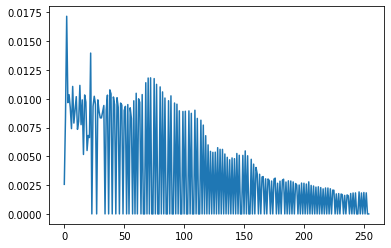

In [57]:
plt.plot(vector_x[0:255], histograma_gris_ecualizado_exp[0:255])

plt.show()

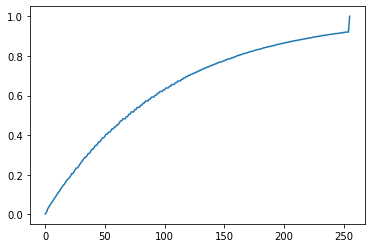

In [58]:
plt.plot(vector_x, acumulada_gris_ecualizado_exp)

plt.show()

In [59]:
#Especificacion Triangular

histograma_gris_ecualizado_tri = histograma(neymar_gris_ecualizado_tri)
acumulada_gris_ecualizado_tri = distribucion_acumulada(neymar_gris_ecualizado_tri)

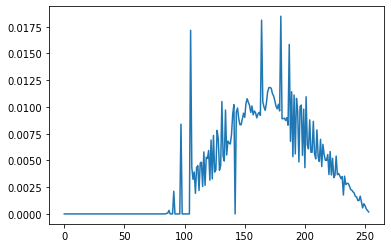

In [60]:
plt.plot(vector_x[0:254], histograma_gris_ecualizado_tri[0:254])

plt.show()

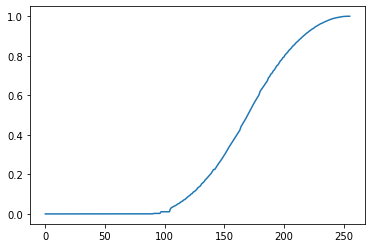

In [61]:
plt.plot(vector_x, acumulada_gris_ecualizado_tri)

plt.show()